<a href="https://colab.research.google.com/github/devesssi/dl-playground/blob/main/day03_revision_exercises_docs_quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
!nvidia-smi
# ! this is called bang and means run this cmd on cmdline

Sun Jun 22 10:30:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P0             27W /   70W |     150MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

check for GPU acces using pytorch

In [ ]:
torch.cuda.is_available()

True


If the above outputs True, PyTorch can see and use the GPU, if it outputs False, it can't see the GPU and in that case, you'll have to go back through the installation steps.

Now, let's say you wanted to setup your code so it ran on CPU or the GPU if it was available.

That way, if you or someone decides to run your code, it'll work regardless of the computing device they're using.

Let's create a device variable to store what kind of device is available.

In [ ]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
torch.cuda.device_count()

1

Device-agnostic code refers to software or programming that is designed to function across various devices or platforms without requiring specific adaptations or modifications.
always try to write device agnostic code


The reason we want to run on the operations on gpu is because it is fsster then cpu





# . Putting tensors (and models) on the GPU

You can put tensors (and models, we'll see this later) on a specific device by calling to(device) on them. Where device is the target device you'd like the tensor (or model) to go to.

Why do this?

GPUs offer far faster numerical computing than CPUs do and if a GPU isn't available, because of our device agnostic code (see above), it'll run on the CPU.

Note: Putting a tensor on GPU using to(device) (e.g. some_tensor.to(device)) returns a copy of that tensor, e.g. the same tensor will be on CPU and GPU. To overwrite tensors, reassign them:

some_tensor = some_tensor.to(device)

Let's try creating a tensor and putting it on the GPU (if it's available).

In [ ]:
# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

Notice the second tensor has device='cuda:0', this means it's stored on the 0th GPU available (GPUs are 0 indexed, if two GPUs were available, they'd be 'cuda:0' and 'cuda:1' respectively, up to 'cuda:n').

# Moving tensors back to the CPU

What if we wanted to move the tensor back to CPU?

For example, you'll want to do this if you want to interact with your tensors with NumPy (NumPy does not leverage the GPU).

Let's try using the torch.Tensor.numpy() method on our tensor_on_gpu.

In [ ]:
# If tensor is on GPU, can't transform it to NumPy (this will error)
tensor_on_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
tensor.numpy()

array([1, 2, 3])

instead, to get a tensor back to CPU and usable with NumPy we can use Tensor.cpu().

This copies the tensor to CPU memory so it's usable with CPUs.

In [ ]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
print(tensor_back_on_cpu, tensor_back_on_cpu.dtype)

[1 2 3] int64


Creation ops in PyTorch refer to a set of functions used to create tensors. These operations include constructing tensors with specific properties, such as initializing them with zeros, ones, or other values, or creating them from existing data

In [ ]:
torch.rand(2,2)

tensor([[0.8513, 0.8549],
        [0.5509, 0.2868]])

In [ ]:
torch.randn(2,2)

tensor([[-1.1913, -1.6518],
        [-1.7177, -1.0074]])

#Exercise

Create a random tensor with shape (7, 7).


In [ ]:
import torch
t1 = torch.randn(7,7)
t2 = torch.rand(1,7)
t3 = t2.T
mul = torch.matmul(t1,t3)
print(f"The tensor is {t1} and {t2}")
print(f"The matrix multiplication is {mul}")

The tensor is tensor([[ 0.7821,  1.0391, -0.7245, -0.8489, -1.2169, -0.0810,  1.3615],
        [-1.3032,  0.6741, -1.3233, -1.3598, -0.8667, -0.5640, -2.0565],
        [-0.3567,  1.0956, -0.6619, -0.8285, -0.6057, -0.1354,  0.7471],
        [ 0.6118,  1.8678,  2.5116, -0.2501,  0.5011,  0.2600, -1.6370],
        [ 0.1577,  0.3957, -1.3677, -0.1007, -1.0606, -0.5824, -0.6153],
        [ 1.5496,  0.5989, -0.6377, -2.2858, -0.3677, -0.8822, -1.0370],
        [ 0.5920, -0.7557,  0.3917,  0.7470,  1.3798,  1.2877,  0.8684]]) and tensor([[0.8099, 0.7743, 0.5278, 0.9356, 0.1470, 0.2019, 0.7259]])
The matrix multiplication is tensor([[ 1.0545],
        [-4.2381],
        [-0.1390],
        [ 1.9712],
        [-1.1021],
        [-1.7413],
        [ 1.8931]])


In [ ]:
random_seed = 0
torch.manual_seed(seed = random_seed)
t1 = torch.rand(7,7)
torch.manual_seed(seed = random_seed)
t2 = torch.rand(1,7)
print(f"t1: {t1}")
print(f"t2: {t2}")

t1==t2

# the factor is size
torch.device("cpu")

t1: tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901],
        [0.8964, 0.4556, 0.6323, 0.3489, 0.4017, 0.0223, 0.1689],
        [0.2939, 0.5185, 0.6977, 0.8000, 0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362],
        [0.1852, 0.3734, 0.3051, 0.9320, 0.1759, 0.2698, 0.1507],
        [0.0317, 0.2081, 0.9298, 0.7231, 0.7423, 0.5263, 0.2437],
        [0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932, 0.2783]])
t2: tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901]])


device(type='cpu')

cuda = torch.device('cuda')     # Default CUDA device
cuda0 = torch.device('cuda:0')
cuda2 = torch.device('cuda:2')  # GPU 2 (these are 0-indexed)

x = torch.tensor([1., 2.], device=cuda0)
# x.device is device(type='cuda', index=0)
y = torch.tensor([1., 2.]).cuda()
# y.device is device(type='cuda', index=0)

with torch.cuda.device(1):
    # allocates a tensor on GPU 1
    a = torch.tensor([1., 2.], device=cuda)

    # transfers a tensor from CPU to GPU 1
    b = torch.tensor([1., 2.]).cuda()
    # a.device and b.device are device(type='cuda', index=1)

    # You can also use ``Tensor.to`` to transfer a tensor:
    b2 = torch.tensor([1., 2.]).to(device=cuda)
    # b.device and b2.device are device(type='cuda', index=1)

    c = a + b
    # c.device is device(type='cuda', index=1)

    z = x + y
    # z.device is device(type='cuda', index=0)

    # even within a context, you can specify the device
    # (or give a GPU index to the .cuda call)
    d = torch.randn(2, device=cuda2)
    e = torch.randn(2).to(cuda2)
    f = torch.randn(2).cuda(cuda2)
    # d.device, e.device, and f.device are all device(type='cuda', index=2)

In [ ]:
torch.device(gpu)

NameError: name 'gpu' is not defined

Yes, there is a GPU equivalent to torch.manual_seed() in PyTorch, which is torch.cuda.manual_seed().
 This function sets the seed for generating random numbers for the current GPU. To set the GPU random seed to 1234, you can use the following code:

import torch

# Set the GPU random seed
torch.cuda.manual_seed(1234)

we can use this cmd to make set the manual seed in the cuda

In [ ]:
import torch
torch.manual_seed( 1234 )
t1 = torch.rand(2,3,device = 'cuda')
torch.manual_seed( 1234 )
t2 = torch.rand(2,3, device = 'cuda')
print(f"t1: {t1}")
print(f"t2: {t2}")

t1: tensor([[0.1272, 0.8167, 0.5440],
        [0.6601, 0.2721, 0.9737]], device='cuda:0')
t2: tensor([[0.1272, 0.8167, 0.5440],
        [0.6601, 0.2721, 0.9737]], device='cuda:0')


In [ ]:
# here we have to take the transpose of one of the tensors
t3 = torch.matmul(t1,t2.T)
t3

tensor([[0.9792, 0.8358],
        [0.8358, 1.4578]], device='cuda:0')

In [ ]:
t3.max(), t3.min()

(tensor(1.4578, device='cuda:0'), tensor(0.8358, device='cuda:0'))

In [ ]:
t3.argmax(),t3.argmin()

(tensor(3, device='cuda:0'), tensor(1, device='cuda:0'))

In [ ]:
t4 = torch.randn(size= (1,1,1,10))
t4

tensor([[[[ 0.0461,  0.4024, -1.0115,  0.2167, -0.6123,  0.5036,  0.2310,
            0.6931, -0.2669,  2.1785]]]])

In [ ]:
# all the dimensions got removed except the last one the squeeze will squeeze the tensor to one dimension
torch.manual_seed(7)
t5 = t4.squeeze()
print(f"t4: {t4}")
print(f"t4 shape: {t4.shape}")
print(f"t5: {t5}")
print(f"t5 shape: {t5.shape}")

t4: tensor([[[[ 0.0461,  0.4024, -1.0115,  0.2167, -0.6123,  0.5036,  0.2310,
            0.6931, -0.2669,  2.1785]]]])
t4 shape: torch.Size([1, 1, 1, 10])
t5: tensor([ 0.0461,  0.4024, -1.0115,  0.2167, -0.6123,  0.5036,  0.2310,  0.6931,
        -0.2669,  2.1785])
t5 shape: torch.Size([10])


Joining tensors You can use torch.cat to concatenate a sequence of tensors along a given dimension. See also torch.stack, another tensor joining op that is subtly different from torch.cat

In [ ]:
t1 = torch.cat([t1, t1, t1], dim=1)
print(t1)

tensor([[0.1272, 0.8167, 0.5440, 0.1272, 0.8167, 0.5440, 0.1272, 0.8167, 0.5440],
        [0.6601, 0.2721, 0.9737, 0.6601, 0.2721, 0.9737, 0.6601, 0.2721, 0.9737]],
       device='cuda:0')


In [ ]:
y3 = torch.rand_like(t1)
y3

tensor([[0.9546, 0.4950, 0.9420, 0.5926, 0.6996, 0.2087, 0.6753, 0.4810, 0.6333],
        [0.5733, 0.9122, 0.7207, 0.7537, 0.4292, 0.4768, 0.5984, 0.8918, 0.3207]],
       device='cuda:0')

the quickstart for loading a dataset

# Datasets & DataLoaders

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that subclass torch.utils.data.Dataset and implement functions specific to the particular data. They can be used to prototype and benchmark your model. You can find them here: Image Datasets, Text Datasets, and Audio Datasets


# Loading a Dataset

Here is an example of how to load the Fashion-MNIST dataset from TorchVision. Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the FashionMNIST Dataset with the following parameters:
root is the path where the train/test data is stored,

train specifies training or test dataset,

download=True downloads the data from the internet if it’s not available at root.

transform and target_transform specify the feature and label transformations

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

1. from torch.utils.data import Dataset
Purpose: This imports the base Dataset class from PyTorch.
Use: You inherit from this class to create your custom datasets.
Example:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = targets
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        target = self.targets[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample, target
2. from torchvision import datasets
Purpose: This provides access to a number of built-in datasets (like CIFAR-10, MNIST, ImageNet, etc.) that are ready to use.
Use: You can directly load standard datasets without needing to write your own loading logic.
Example:
from torchvision import datasets

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
3. from torchvision.transforms import ToTensor
Purpose: This converts a PIL image or NumPy array into a PyTorch tensor.
Use: It's commonly used as part of the preprocessing step to convert image data into a format compatible with PyTorch models.
It also scales pixel values from [0, 255] to [0.0, 1.0].
Example:
from torchvision.transforms import ToTensor

transform = ToTensor()
tensor_image = transform(pil_image)  # Converts PIL image to tensor

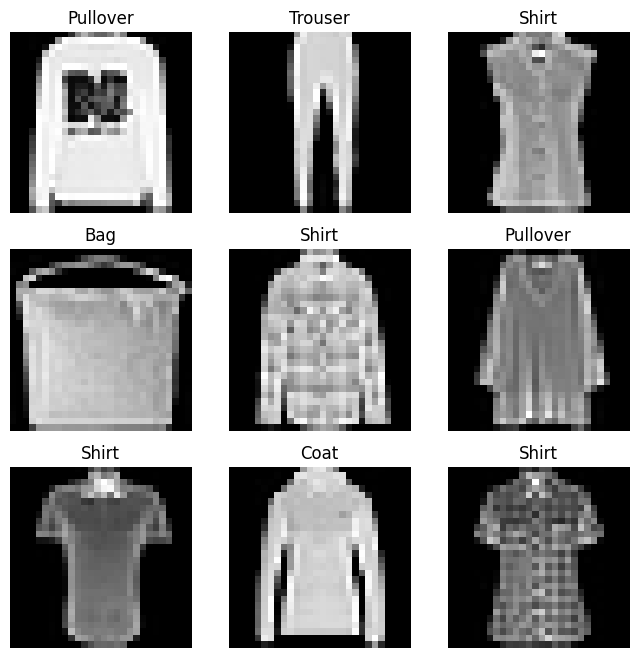

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()